In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

In [3]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
df_train.drop('id', axis = 1, inplace = True)
df_test.drop('id', axis = 1, inplace = True)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


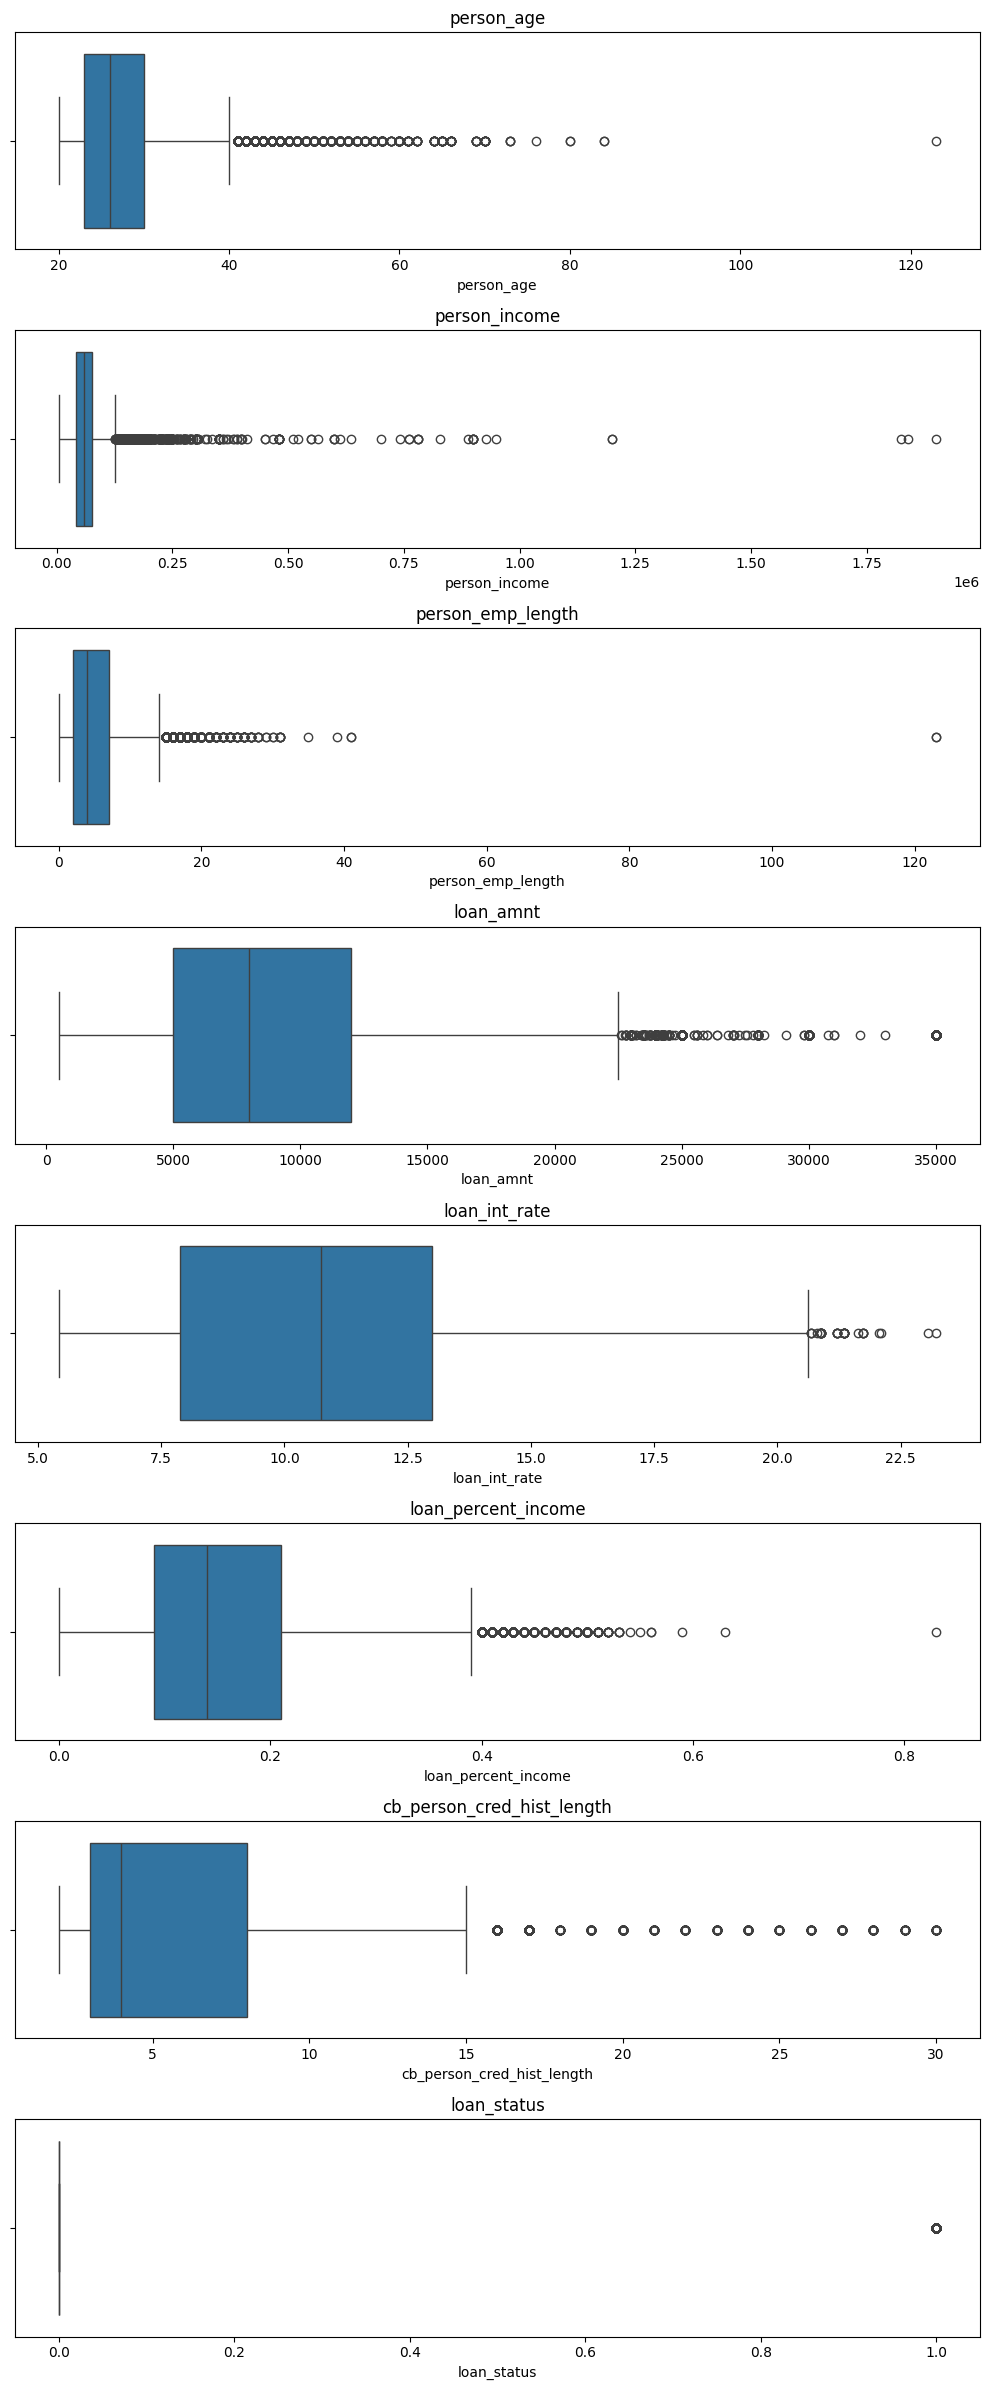

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

num = df_train.select_dtypes(include='number')

fig, axes = plt.subplots(len(num.columns), 1, figsize=(10, 3*len(num.columns)))

for ax, col in zip(axes, num.columns):
    sns.boxplot(x=num[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()


In [7]:
df_train['person_age'] = df_train['person_age'].apply(lambda x: df_train['person_age'].median() if x > 100 else x)
df_test['person_age'] = df_test['person_age'].apply(lambda x: df_test['person_age'].median() if x > 100 else x)

In [8]:
df_train['person_income_log'] = np.log1p(df_train['person_income'])
df_test['person_income_log'] = np.log1p(df_test['person_income'])

In [9]:
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,person_income_log
0,37.0,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,10.463132
1,22.0,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,10.933125
2,29.0,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,10.268165
3,30.0,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,11.156265
4,22.0,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,11.002117


In [10]:
df_train['person_income_log'].sort_values()

39716     8.343078
42581     8.517393
32894     9.169623
31409     9.169623
10435     9.169623
           ...    
19060    13.997833
2093     13.997833
37591    14.416543
12404    14.425159
17387    14.457365
Name: person_income_log, Length: 58645, dtype: float64

In [11]:
df_train.drop('person_income', axis = 1, inplace = True)
df_test.drop('person_income', axis = 1, inplace = True)

In [12]:
df_train['person_emp_length'] = df_train['person_emp_length'].apply(lambda x: df_train['person_emp_length'].median() if x > 60 else x)
df_test['person_emp_length'] = df_test['person_emp_length'].apply(lambda x: df_test['person_emp_length'].median() if x > 60 else x)

In [13]:
df_train.head()

,person_age,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,person_income_log
0,37.0,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,10.463132
1,22.0,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,10.933125
2,29.0,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,10.268165
3,30.0,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,11.156265
4,22.0,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,11.002117


In [14]:
tr = []
ts = []
for i in df_test.columns:
    tr.append(df_train[i].unique())
    ts.append(df_test[i].unique())
    

In [15]:
tr

[array([37., 22., 29., 30., 27., 25., 21., 35., 31., 26., 28., 32., 23.,
        24., 33., 44., 38., 43., 46., 48., 36., 41., 34., 40., 47., 42.,
        51., 50., 39., 56., 60., 49., 58., 54., 45., 59., 65., 53., 55.,
        57., 52., 62., 64., 84., 70., 66., 73., 69., 61., 20., 80., 76.]),
 array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object),
 array([ 0.,  6.,  8., 14.,  2.,  9., 11.,  5.,  1., 13.,  3., 10., 12.,
         4.,  7., 21., 17., 16., 18., 19., 15., 20., 23., 24., 26., 22.,
        25., 41., 27., 28., 35., 29., 30., 31., 39.]),
 array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
        'HOMEIMPROVEMENT'], dtype=object),
 array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object),
 array([ 6000,  4000, 12000,  9000,  2500,  5000, 15000, 12800, 10000,
        16000,  7300, 17000,  5950,  4800,  3200,  7000,  3000,  3500,
        14000,  2800,  2000,  5500, 14400, 15900, 12500,  8000,  2400,
        20000, 14125,  9600, 17200,  4200,  7200, 1800

In [16]:
ts

[array([23, 26, 33, 32, 22, 29, 25, 27, 21, 38, 30, 42, 28, 24, 36, 37, 31,
        35, 40, 43, 46, 39, 51, 48, 34, 50, 54, 41, 44, 52, 45, 47, 55, 64,
        57, 20, 62, 53, 58, 49, 70, 60, 63, 59, 61, 65, 56, 66, 69, 68, 84,
        94]),
 array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object),
 array([ 3.,  6.,  5.,  4.,  8., 10.,  0.,  1.,  2., 12., 14.,  9., 13.,
         7., 11., 15., 24., 21., 42., 16., 18., 19., 17., 20., 31., 23.,
        22., 26., 29., 28., 25.]),
 array(['HOMEIMPROVEMENT', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
        'EDUCATION', 'MEDICAL'], dtype=object),
 array(['F', 'C', 'E', 'A', 'D', 'B', 'G'], dtype=object),
 array([25000, 10000,  4000,  7000, 15000, 22000,  8000,  6250,  7200,
        14400, 12000, 11500, 15250,  6000,  9000,  3000, 20000,  2950,
         1000,  6500, 14000,  5000,  7500, 24250,  2500,  2400,  9600,
        13000,  5400,  4800,  2000,  5500,  3600,  1500,  4200,  8500,
        10200, 11000, 21000,  4500, 12800, 10800, 17000

In [17]:
from sklearn.compose import ColumnTransformer

In [18]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

In [19]:
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('loan_status')
cat_cols_onehot = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']  
cat_cols_ordinal = ['loan_grade']  

grade_order = [['A','B','C','D','E','F','G']]

ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols_onehot),
        ('ordinal', OrdinalEncoder(categories=grade_order), cat_cols_ordinal)
    ]
)
df_train_transformed = ct.fit_transform(df_train)

In [20]:
df_test

,person_age,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_income_log
0,23,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,11.141876
1,26,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,11.472114
2,26,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,10.308986
3,33,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,10.819798
4,26,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,11.532738
...,...,...,...,...,...,...,...,...,...,...,...
39093,22,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4,10.348205
39094,22,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3,10.778977
39095,51,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25,11.002117
39096,22,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4,10.491302


In [21]:
df_test_transformed = ct.transform(df_test)

In [22]:
num_cols_scaled = num_cols

onehot_cols = ct.named_transformers_['onehot'].get_feature_names_out(cat_cols_onehot)

ordinal_cols = cat_cols_ordinal

all_cols = list(num_cols_scaled) + list(onehot_cols) + list(ordinal_cols)

df_train_transformed = pd.DataFrame(df_train_transformed, columns=all_cols)
df_test_transformed = pd.DataFrame(df_test_transformed, columns=all_cols)

In [23]:
df_train_transformed.describe()

,person_age,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_income_log,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade
count,5.864500e+04,5.864500e+04,5.864500e+04,5.864500e+04,5.864500e+04,5.864500e+04,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,-2.689752e-17,-2.229344e-17,-7.723949e-17,1.071781e-15,-1.058332e-16,1.158289e-16,-2.774079e-15,0.423293,0.001518,0.053508,0.521681,0.155734,0.209242,0.107085,0.186444,0.170790,0.170705,0.851616,0.148384,1.066638
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.494085,0.038927,0.225047,0.499534,0.362606,0.406771,0.309224,0.389468,0.376329,0.376254,0.355484,0.355484,1.046181
min,-1.253962e+00,-1.204650e+00,-1.566846e+00,-1.732601e+00,-1.736675e+00,-9.464887e-01,-5.721918e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.556465e-01,-6.917010e-01,-7.580407e-01,-9.219695e-01,-7.551178e-01,-6.982981e-01,-6.822345e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-2.573307e-01,-1.787516e-01,-2.188370e-01,2.376715e-02,-2.098081e-01,-4.501075e-01,2.427319e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,4.070903e-01,5.906724e-01,5.001013e-01,7.619031e-01,5.536255e-01,5.426548e-01,6.043547e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
max,9.376774e+00,9.310812e+00,4.633996e+00,4.132944e+00,7.315466e+00,6.002848e+00,7.661709e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [24]:
df_train_transformed

,person_age,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_income_log,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade
0,1.569827,-1.204650,-0.578306,0.267616,0.117378,2.031798,-1.081310,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.921752,0.334198,-0.937775,0.880532,-0.973242,-0.946489,-0.052537,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
2,0.240985,0.847147,-0.578306,-0.585854,0.553626,1.039036,-1.508074,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.407090,2.385995,0.500101,0.142396,0.117378,-0.201917,0.435896,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,-0.921752,-0.691701,-0.578306,-1.238314,-0.646056,-0.698298,0.098479,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1.071511,0.077723,2.836651,1.737297,0.553626,1.039036,1.615698,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
58641,0.074880,-1.204650,0.140632,0.676227,2.080493,0.542655,-1.508074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
58642,-0.755647,0.590672,-0.434518,1.753773,-0.100746,-0.946489,-0.580409,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
58643,-0.921752,-0.691701,-0.758041,-0.585854,0.117378,-0.698298,-1.418721,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
df_train['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [26]:
y = df_train['loan_status']

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [150, 200, 300],
    'max_depth': [None, 15, 25],
    'min_samples_leaf': [1, 2, 3]
}

rf = RandomForestClassifier(
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

rs = RandomizedSearchCV(
    rf,
    param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rs.fit(df_train_transformed, y)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [None, 15, ...], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [150, 200, ...]}"
,n_iter,20
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [28]:
rs.best_params_

{'n_estimators': 200, 'min_samples_leaf': 3, 'max_depth': 25}

In [29]:
y_pred = rs.predict(df_test_transformed)

In [30]:
y_pred

array([1, 0, 1, ..., 0, 0, 1], shape=(39098,))

In [31]:
df_sub['loan_status'] = y_pred

In [32]:
df_sub.to_csv('sub2.csv', index = False)